In [ ]:
# LOAD the data
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!time pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 36.1 MB/s eta 0:00:00

real	0m6.076s
user	0m4.250s
sys	0m0.471s


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sn
# import scipy as sp

import random
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

from rdkit import Chem # A core definition
from rdkit.Chem.Draw import MolsToGridImage # For displaying multiple molecules
from rdkit.Chem.AllChem import * # conformer generation and adding H 
from rdkit.Chem.rdMolDescriptors import * # To calculate descriptors
from rdkit.Chem.Draw import IPythonConsole # This displays the molecule in-line
from rdkit.Chem import PandasTools # for pandas dataframe with rdkit
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
import pandas.io.formats.style

In [ ]:
############################################Sexual data
#Optional: move to the desired location:
%cd /content/drive/MyDrive/PhD/PTS_datasets/
!ls '/content/drive/MyDrive/PhD/PTS_datasets/'
import pandas as pd
sxl= pd.read_csv("M_sexual_LibrariesC_hits_nd_2ndclst_nhits.csv")
sxl['S_Hit'] = sxl['S_Hit'].replace(np.nan, "No")
sxl = sxl.iloc[: , 1:]
print(sxl['S_Hit'].value_counts())
sxl

/content/drive/MyDrive/PhD/PTS_datasets
 ABSActiveInactiveFeatCorrelationOnABSActives.csv
 ABSActiveInactiveFeatCorrelationOnABSInactives.csv
 absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualLRFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualRFFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 asexualsFeaturesZtestprop.csv
 asexualsFeaturesZtestpropInact.csv
 asexualsFeaturesZtestproportionsActvsInactv.csv
 asexualsFeaturesZtestpropTopABSfeat.csv
 asexualsFeaturesZtestpropTopDualfeat.csv
 asexualsFeaturesZtestpropTopfeat.csv
 asexualsGBMhpt_UMFP_model5atom500bitFinal.pkl
 asexualsLogisticRegressionFinalHPT_UMFP_model5005.pkl
 asexualsSVCFinalHPT_UMFP_model5005.pkl
 axldeepinsighOverUnderXttestMFP.npy
 axldeepinsighOverUnderXttrainMFP.npy
 axldeepinsighOverUnderYttestMFP.npy
 axldeepinsighOverUnderYttrainMFP.npy
 axl_UnderMFP_GBM_HPT5005_FeatureImp.csv
 axl_UnderMFP_LR_HPT_FeatureImp.csv
 axl_U

,Smiles,S_Hit
0,NC(=O)c1cccc2nc([C@H]3CCN(Cc4ccccn4)C3)[nH]c12,Yes
1,Fc1ccc2[nH]c(C3CCCN3Cc3c[nH]cn3)nc2c1,Yes
2,COc1c(C)cnc(CN(C)C2CCCCC2)c1C,Yes
3,Cc1cccc(CN2CCCC2c2cccc(Nc3nccs3)n2)c1,Yes
4,CCSCCNc1nc(-c2ccccn2)nc2c1c(C)nn2C,Yes
...,...,...
9886,Cc1nc(C)n(C2CCCN(C(=O)c3ncoc3C(C)C)C2)n1,No
9887,COCCN1CCN(Cc2c(C)noc2C)Cc2ccc(C)nc21,No
9888,CCc1ncnc2c1CCN(Cc1ccc3c(c1)OCO3)CC2,No
9889,CCC1CN(CC(=O)NCCN2CCCCCC2)c2ccccc2S1,No


# MACCSKeysFingerprint

In [ ]:
!pip install deepchem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.2/693.2 KB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 19.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1


In [ ]:
import deepchem as dc
from deepchem.feat import MACCSKeysFingerprint

In [ ]:
sxl["Target"] = np.where(sxl["S_Hit"]== "Yes", 1,0)
sxl["Target"].value_counts()

0    8975
1     916
Name: Target, dtype: int64

In [ ]:
dchm= sxl["Smiles"]
dchm

0       NC(=O)c1cccc2nc([C@H]3CCN(Cc4ccccn4)C3)[nH]c12
1                Fc1ccc2[nH]c(C3CCCN3Cc3c[nH]cn3)nc2c1
2                        COc1c(C)cnc(CN(C)C2CCCCC2)c1C
3                Cc1cccc(CN2CCCC2c2cccc(Nc3nccs3)n2)c1
4                   CCSCCNc1nc(-c2ccccn2)nc2c1c(C)nn2C
                             ...                      
9886          Cc1nc(C)n(C2CCCN(C(=O)c3ncoc3C(C)C)C2)n1
9887              COCCN1CCN(Cc2c(C)noc2C)Cc2ccc(C)nc21
9888               CCc1ncnc2c1CCN(Cc1ccc3c(c1)OCO3)CC2
9889              CCC1CN(CC(=O)NCCN2CCCCCC2)c2ccccc2S1
9890                Cc1cnn(CC2CCCN2Cc2nc3ccccc3nc2C)c1
Name: Smiles, Length: 9891, dtype: object

In [ ]:

mols = [Chem.MolFromSmiles(x) for x in dchm]
featurizer = MACCSKeysFingerprint()
maccs = featurizer.featurize(mols)
maccs

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
df=[]
df = pd.DataFrame(maccs)
#df["Target"]= sxl["Target"]
df

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9886,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
9887,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
9888,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
9889,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split
Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(df, sxl["Target"],test_size=0.2, random_state=42)

In [ ]:
###################################################################### Logistic Regression adjusting classweights (https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html)
from sklearn.linear_model import  LogisticRegression

lrc = LogisticRegression(class_weight={0:1,1:10}, max_iter=300)

# fit the predictor and target
lrc.fit(Xt_train, Yt_train)

# predict
lrc_predict = lrc.predict(Xt_test)# check performance


In [ ]:
# Save Model Using joblib
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

%cd /content/
# save the model to disk
filename = 'sexualsLogisticRegression_UMACCS_model.sav'
joblib.dump(lrc, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(Xt_test, Yt_test)
print(result)

/content
0.921677614957049


In [ ]:
!cp sexualsLogisticRegression_UMACCS_model.sav /content/drive/MyDrive/PhD/LR_MACCS

In [ ]:
###Import model
#Optional: move to the desired location:
%cd /content/drive/MyDrive/PhD/LR_MACCS
!ls '/content/drive/MyDrive/PhD/LR_MACCS'

/content/drive/MyDrive/PhD/LR_MACCS
sexualsLogisticRegression_UMACCS_model.sav


In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

# load the model from disk
loaded_model = joblib.load('/content/drive/MyDrive/PhD/LR_MACCS/sexualsLogisticRegression_UMACCS_model.sav')
result = loaded_model.score(Xt_test, Yt_test)
print(result)

0.921677614957049


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,lrc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,lrc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,lrc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,lrc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,lrc_predict)
cm

Accuracy: 0.921678
Recall 0.869110
precision 0.560811
F1 score: 0.681725


array([[1658,  130],
       [  25,  166]])

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, lrc_predict))
print('Accuracy score:',accuracy_score(Yt_test, lrc_predict))
print('F1 score:',f1_score(Yt_test, lrc_predict))

ROCAUC score: 0.8982015062604684
Accuracy score: 0.921677614957049
F1 score: 0.6817248459958932


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, lrc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, lrc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, lrc_predict)
print(matrix)

Cohens kappa: 0.639421
ROC AUC: 0.898202
[[1658  130]
 [  25  166]]


In [ ]:
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)

Test Set: 1979
0    1788
1     191
Name: Target, dtype: int64
[[1658  130]
 [  25  166]]


In [ ]:
##################################################Cross validation kfold=10
from sklearn.linear_model import  LogisticRegression

lrc = LogisticRegression(class_weight={0:1,1:10}, max_iter=300)

# fit the predictor and target
fit=lrc.fit(Xt_train, Yt_train)

# predict
lrc_predict = lrc.predict(Xt_test)# check performance

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lrc,Xt_train, Yt_train, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.93 accuracy with a standard deviation of 0.01


# Hyperparameter Tuning
Logistic regression does not really have any critical hyperparameters to tune.

Sometimes, you can see useful differences in performance or convergence with different solvers (solver).

Regularization (penalty) can sometimes be helpful.


Note: not all solvers support all regularization terms.

The C parameter controls the penality strength, which can also be effective.


---

Logistic Regression Hyperparameters we’ll be Looking at:

*   solver in [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]
*   penalty in [‘none’, ‘l1’, ‘l2’, ‘elasticnet’]
*   C in [100, 10, 1.0, 0.1, 0.01]
---
https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
https://www.projectpro.io/recipes/optimize-hyper-parameters-of-logistic-regression-model-using-grid-search-in-python

In [ ]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
#X = mfpdf  # we only take the first three features. iF THESE FEATURES ARE NOT NB CHANGE!!
#y = sxl["Target"]

# define models and parameters
model = LogisticRegression(class_weight={0:1,1:10})
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(Xt_train, Yt_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.932802 using {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.932507 (0.007931) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.932802 (0.007931) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.932550 (0.007957) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.932465 (0.007588) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.932634 (0.007458) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.932423 (0.007540) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.931791 (0.006746) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.931412 (0.006749) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.931623 (0.006729) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.926821 (0.005996) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.926947 (0.005942) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.927031 (0.005857) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.915066 (0.005554) with: {

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print(grid_result.best_params_)
print(grid_result.best_score_)

{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.9328019448594669


In [ ]:
print(grid_result.cv_results_)

{'mean_fit_time': array([8.40517854, 0.45190898, 1.16819469, 3.10810455, 0.47743727,
       0.67710054, 2.68917503, 0.81298531, 0.68315075, 1.32306056,
       0.57417886, 0.3973692 , 0.58186402, 0.20752591, 0.19879614]), 'std_fit_time': array([1.49309663, 0.06990668, 0.10635643, 0.39575093, 0.12745302,
       0.06103971, 0.8291319 , 0.22368519, 0.13231302, 0.30059905,
       0.08222324, 0.07412562, 0.09257946, 0.0235857 , 0.07239124]), 'mean_score_time': array([0.00676936, 0.00683155, 0.00625068, 0.00676606, 0.00679881,
       0.00656432, 0.01291064, 0.00986228, 0.01128521, 0.01047777,
       0.00878241, 0.0124241 , 0.00807822, 0.00672303, 0.01009882]), 'std_score_time': array([0.00109654, 0.00159397, 0.00048522, 0.00054305, 0.00143234,
       0.00201218, 0.00776329, 0.0037869 , 0.00542367, 0.00470296,
       0.00449897, 0.00592741, 0.00424868, 0.00107207, 0.00532329]), 'param_C': masked_array(data=[100, 100, 100, 10, 10, 10, 1.0, 1.0, 1.0, 0.1, 0.1,
                   0.1, 0.01, 0.01,

In [ ]:
clf_predict = grid_result.predict(Xt_test)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.932802 using {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.932507 (0.007931) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.932802 (0.007931) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.932550 (0.007957) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.932465 (0.007588) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.932634 (0.007458) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.932423 (0.007540) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.931791 (0.006746) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.931412 (0.006749) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.931623 (0.006729) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.926821 (0.005996) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.926947 (0.005942) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.927031 (0.005857) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.915066 (0.005554) with: {

In [ ]:
from sklearn.linear_model import  LogisticRegression

lrc = LogisticRegression(class_weight={0:1,1:10}, max_iter=300, C= 100, penalty= 'l2', solver= 'lbfgs')

# fit the predictor and target
fit=lrc.fit(Xt_train, Yt_train)

# predict
lr_predict = lrc.predict(Xt_test)# check performance

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,lr_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,lr_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,lr_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,lr_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,lr_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, lr_predict))
print('Accuracy score:',accuracy_score(Yt_test, lr_predict))
print('F1 score:',f1_score(Yt_test, lr_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, lr_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, lr_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, lr_predict)
print(matrix)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lrc,Xt_train, Yt_train, cv=10)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print(scores.mean())
print(scores.std())

Accuracy: 0.919656
Recall 0.853403
precision 0.554422
F1 score: 0.672165
ROCAUC score: 0.8900684610609415
Accuracy score: 0.9196563921172309
F1 score: 0.6721649484536082
Cohens kappa: 0.628722
ROC AUC: 0.890068
[[1657  131]
 [  28  163]]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

0.93 accuracy with a standard deviation of 0.01
0.9323845279597492
0.01336191875986907


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Save Model Using joblib
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

%cd /content/
# save the model to disk
filename = 'sexualsLR_HPTFInal_UMACCS_model.pkl'
joblib.dump(lrc, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(Xt_test, Yt_test)
print(result)

/content
0.9196563921172309


In [ ]:
!cp 'sexualsLR_HPTFInal_UMACCS_model.pkl' /content/drive/MyDrive/PhD/LR_MACCS

# Feature Importance extraction

---
We can fit a LogisticRegression model on the regression dataset and retrieve the coeff_ property that contains the coefficients found for each input variable.

These coefficients can provide the basis for a crude feature importance score. This assumes that the input variables have the same scale or have been scaled prior to fitting a model.


https://machinelearningmastery.com/calculate-feature-importance-with-python/

---



In [ ]:
import joblib
# load the model from disk
loaded_model = joblib.load('/content/drive/MyDrive/PhD/LR_MACCS/sexualsLogisticRegressionFinalHPT_UMACCS_model.sav')
result = loaded_model.score(Xt_test, Yt_test)
print(result)

0.9206670035371399


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: -0.57278
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.24385
Feature: 12, Score: 0.00000
Feature: 13, Score: -1.06947
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.64964
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.50394
Feature: 20, Score: 0.00000
Feature: 21, Score: -0.77941
Feature: 22, Score: -0.50793
Feature: 23, Score: -1.04535
Feature: 24, Score: -0.38074
Feature: 25, Score: -0.43453
Feature: 26, Score: 0.75365
Feature: 27, Score: 6.87921
Feature: 28, Score: 1.31473
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: -0.12263
Feature: 33, Score: -1.01751
Feature: 34, Score: 0.13076
Feature: 35, Score: 0

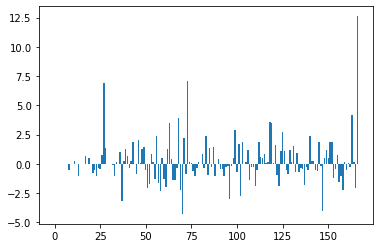

In [ ]:

# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
#model = LogisticRegression()
# fit the model
loaded_model.fit(Xt_train, Yt_train)

# get importance
importance = loaded_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,10)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: -0.57278
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.24385
Feature: 12, Score: 0.00000
Feature: 13, Score: -1.06947
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.64964
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.50394
Feature: 20, Score: 0.00000
Feature: 21, Score: -0.77941
Feature: 22, Score: -0.50793
Feature: 23, Score: -1.04535
Feature: 24, Score: -0.38074
Feature: 25, Score: -0.43453
Feature: 26, Score: 0.75365
Feature: 27, Score: 6.87921
Feature: 28, Score: 1.31473
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: -0.12263
Feature: 33, Score: -1.01751
Feature: 34, Score: 0.13076
Feature: 35, Score: 0

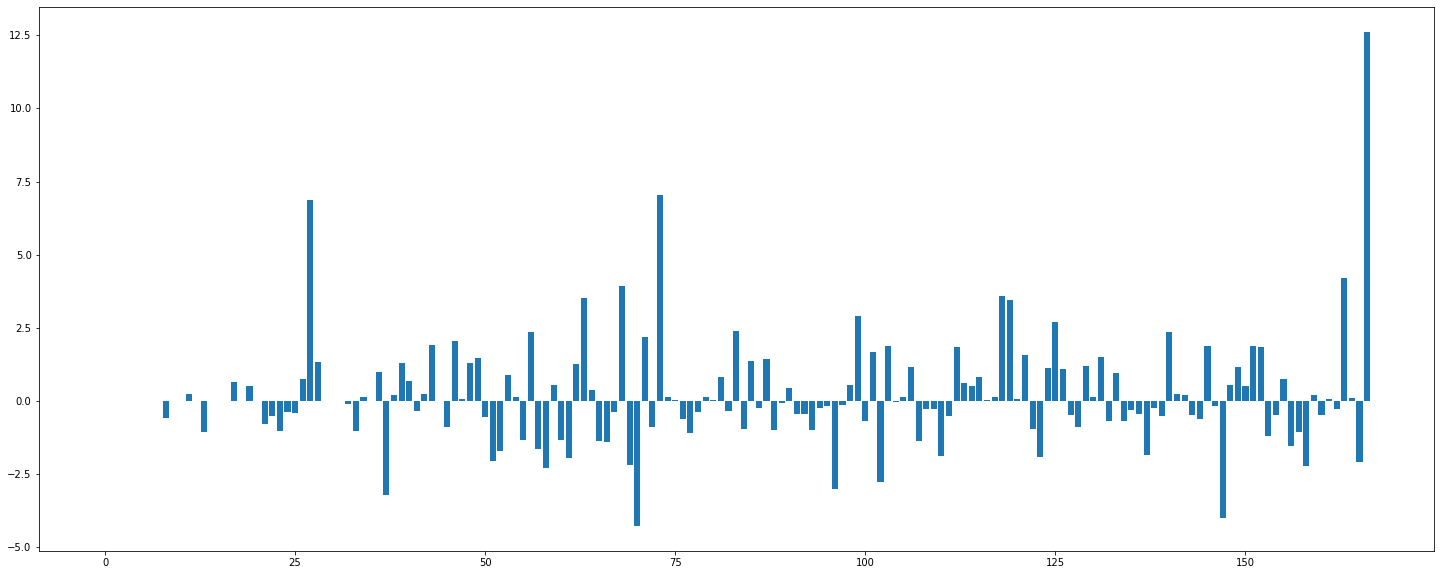

In [ ]:

# get importance
importance = loaded_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
imp = pd.DataFrame(importance)
imp2= imp.set_axis(['Score'], axis=1, inplace=False)
imp2

,Score
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
162,-0.269220
163,4.205183
164,0.112054
165,-2.106742


In [ ]:
imp2.nlargest(166, 'Score')

,Score
166,12.617533
73,7.039820
27,6.879210
163,4.205183
68,3.912564
...,...
58,-2.315173
102,-2.792776
96,-3.026148
37,-3.210319


In [ ]:
##
from google.colab import files
f_imp= imp2.nlargest(166, 'Score')
f_imp.to_csv('sxl_UnderMACCS_LR_HPT_FeatureImp.csv', encoding = 'utf-8-sig') 
files.download('sxl_UnderMACCS_LR_HPT_FeatureImp.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp 'sxl_UnderMACCS_LR_HPT_FeatureImp.csv' /content/drive/MyDrive/PhD/LR_MACCS

In [ ]:
#Replace numbers with chemical info

In [ ]:
#Feature importance
feature_names = [f"feature {i}" for i in range(Xt_train.shape[1])]

In [ ]:
feature_names

['feature 0',
 'feature 1',
 'feature 2',
 'feature 3',
 'feature 4',
 'feature 5',
 'feature 6',
 'feature 7',
 'feature 8',
 'feature 9',
 'feature 10',
 'feature 11',
 'feature 12',
 'feature 13',
 'feature 14',
 'feature 15',
 'feature 16',
 'feature 17',
 'feature 18',
 'feature 19',
 'feature 20',
 'feature 21',
 'feature 22',
 'feature 23',
 'feature 24',
 'feature 25',
 'feature 26',
 'feature 27',
 'feature 28',
 'feature 29',
 'feature 30',
 'feature 31',
 'feature 32',
 'feature 33',
 'feature 34',
 'feature 35',
 'feature 36',
 'feature 37',
 'feature 38',
 'feature 39',
 'feature 40',
 'feature 41',
 'feature 42',
 'feature 43',
 'feature 44',
 'feature 45',
 'feature 46',
 'feature 47',
 'feature 48',
 'feature 49',
 'feature 50',
 'feature 51',
 'feature 52',
 'feature 53',
 'feature 54',
 'feature 55',
 'feature 56',
 'feature 57',
 'feature 58',
 'feature 59',
 'feature 60',
 'feature 61',
 'feature 62',
 'feature 63',
 'feature 64',
 'feature 65',
 'feature 66',
 'fea

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,10)

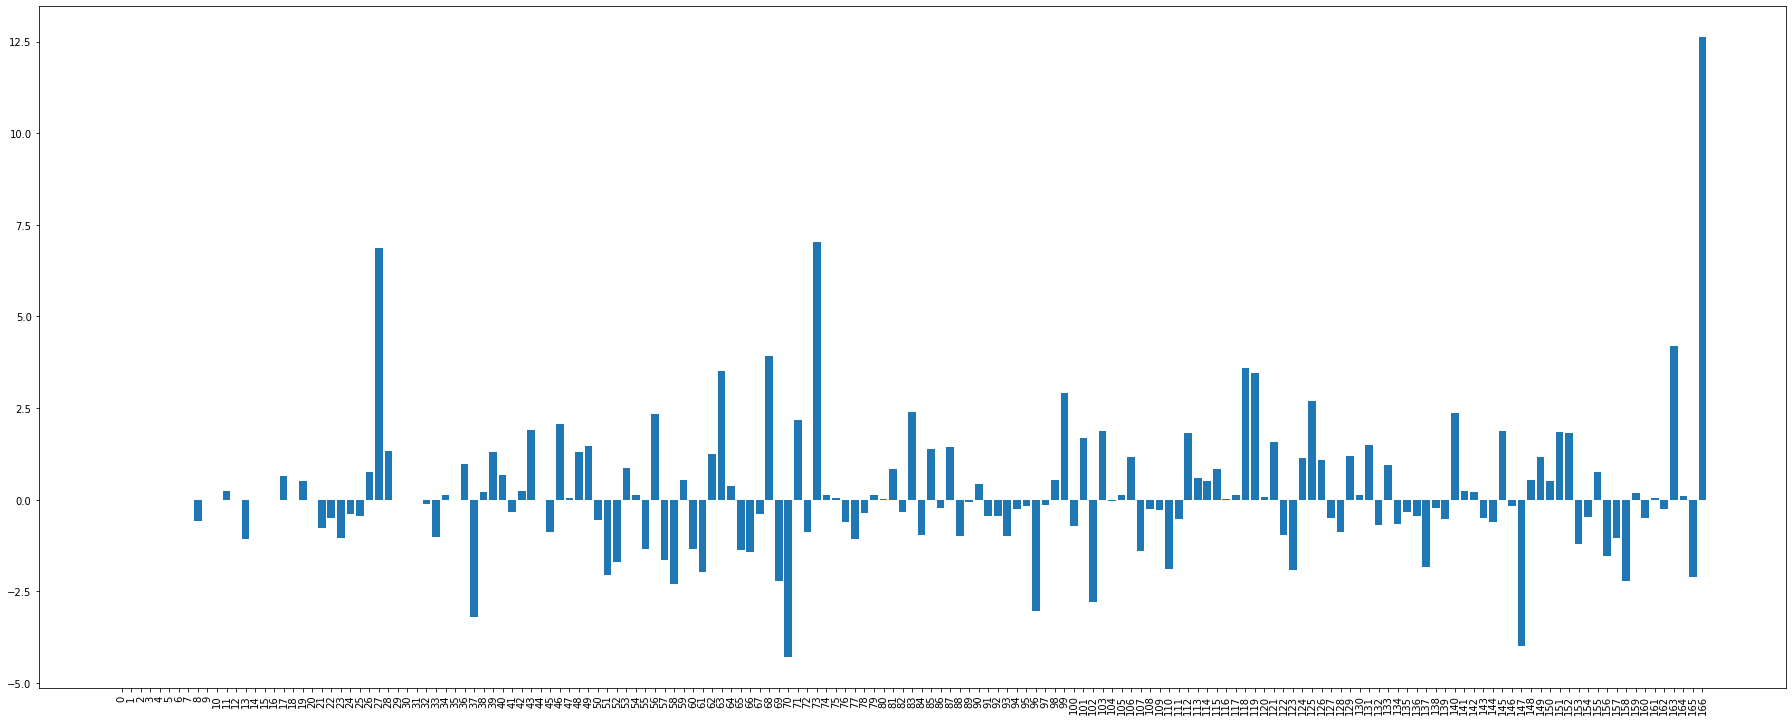

In [ ]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
plt.tight_layout()
plt.xticks([x for x in range(len(importance))], rotation=90)
pyplot.show()

# Testing PRB diverse molecules

---



---



In [ ]:
###Import model
#Optional: move to the desired location:
%cd /content/drive/MyDrive/PhD/Asxl_undersmpl_MFP/PBR test set
!ls '/content/drive/MyDrive/PhD/Asxl_undersmpl_MFP/PBR test set'

/content/drive/MyDrive/PhD/Asxl_undersmpl_MFP/PBR test set
PRBdata.csv  PRB_test_set2.csv	PRB_test_set.csv


In [ ]:
prb= pd.read_csv("PRB_test_set2.csv", sep= ";")
prb= prb.dropna()

In [ ]:
prb

,Compound ID,SMILES,pLDH2 µM,Luciferase assay1µM,ATP assay1µM,PrestoBlue1µM,Sexual hit,Luciferase assay,Unnamed: 8,ATP assay,Unnamed: 10,PrestoBlue®,Unnamed: 12,Final Primary Screen Gametocyte Inhibition (%) 5 µM,Shit,Compound ID.1
0,MMV000008,CCN(CC)CCCC(C)Nc1ccnc2cc(Cl)ccc12,"85,78","29,65",0,"16,93",0,"29,65","5,51",0,0,"16,93",6,6,0.0,MMV000008
2,MMV000043,COc1cc(C)c2c(Oc3cccc(c3)C(F)(F)F)c(OC)cc(NC(C)...,"56,47",0,0,"47,86",1,0,"79,63",0,"69,98","47,86","71,7","79,6",1.0,MMV000043
3,MMV000051,CCC[C@@H]1C[C@H](N(C)C1)C(=O)N[C@H]([C@H](C)Cl...,"72,93",0,0,"10,27",0,0,0,0,"1,18","10,27","24,21","24,2",0.0,MMV000051
4,MMV000059,O1C(=CC=C1C2=CC=C(C(=N)NOC)C=C2)C3=CC=C(C(=N)N...,"-3,01",0,"0,62","11,76",0,0,0,"0,62",0,"11,76","9,28","91,6",1.0,MMV000725
5,MMV000725,ClC3=C(OCC(O)C[N]1[C](=N)[N](CCN(CC)CC)C2=C1C=...,"95,4",0,"82,19",0,1,0,"91,64","82,19","90,71",0,0,"5,8",0.0,MMV001014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,MMV690653,FC3=C2N=C(N(C1=C(OC)C=CC(=C1)C(F)(F)F)[C@H](C2...,"22,9",0,0,"11,08",0,0,"6,89",0,0,"11,08","1,05","14,8",0.0,MMV690547
396,MMV690706,ONC(=O)C1(CS(=O)(=O)c2ccc(Oc3ccc(Cl)cc3)cc2)CC...,"28,12","2,48",0,"22,62",0,"2,48",0,0,0,"22,62","28,18","21,3",0.0,MMV690555
397,MMV811071,CN(C)CCNC(=O)c1cccc2cccnc12,"9,84",0,0,0,0,0,"10,08",0,0,0,0,"6,9",0.0,MMV690621
398,MMV831201,FC(F)(C1N2N=CC(C(NCC(C=C3)=CC=C3OC)=O)=C2NC(C(...,"37,21",0,"2,93",0,0,0,"6,49","2,93","4,83",0,"34,64","6,9",0.0,MMV690653


In [ ]:
dchm2= prb["SMILES"]
dchm2

0                      CCN(CC)CCCC(C)Nc1ccnc2cc(Cl)ccc12
2      COc1cc(C)c2c(Oc3cccc(c3)C(F)(F)F)c(OC)cc(NC(C)...
3      CCC[C@@H]1C[C@H](N(C)C1)C(=O)N[C@H]([C@H](C)Cl...
4      O1C(=CC=C1C2=CC=C(C(=N)NOC)C=C2)C3=CC=C(C(=N)N...
5      ClC3=C(OCC(O)C[N]1[C](=N)[N](CCN(CC)CC)C2=C1C=...
                             ...                        
395    FC3=C2N=C(N(C1=C(OC)C=CC(=C1)C(F)(F)F)[C@H](C2...
396    ONC(=O)C1(CS(=O)(=O)c2ccc(Oc3ccc(Cl)cc3)cc2)CC...
397                          CN(C)CCNC(=O)c1cccc2cccnc12
398    FC(F)(C1N2N=CC(C(NCC(C=C3)=CC=C3OC)=O)=C2NC(C(...
399                      NC1=CC(=NNC1=O)c2nc3ccccc3[nH]2
Name: SMILES, Length: 399, dtype: object

In [ ]:
mols2 = [Chem.MolFromSmiles(x) for x in dchm2]
featurizer = MACCSKeysFingerprint()
maccs2 = featurizer.featurize(mols2)
maccs2

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0]])

In [ ]:

Xtest = np.array(maccs2)
Ytest = np.array(list(prb["Sexual hit"]))
print("Input",Xt[0])
print("Target",Yt[0])


Input [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1
 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0]
Target 1


In [ ]:
###check to see if hits are in correct places
print(maccs2[0:4])
print(Ytest[0:4])


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1
  1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 0
  0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1
  1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1
  1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1
  1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1
  0 0 1 1 1 1 

In [ ]:
df=[]
df = pd.DataFrame(maccs2)
#df["Target"]= sxl["Target"]
df

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
395,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,0
396,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
397,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


In [ ]:
lrc_predict = loaded_model.predict(df)

In [ ]:
df= lrc_predict
df= pd.DataFrame(df)
print(df.value_counts())
df

1    228
0    171
dtype: int64


,0
0,1
1,1
2,0
3,1
4,1
...,...
394,1
395,1
396,0
397,1


In [ ]:

prd= df.set_axis(['Predicted'], axis=1, inplace=False)
ht= prb["Sexual hit"]
print(ht)
Yt = np.array(list(prb["Sexual hit"]))
#prd['Actual'] = prd['Actual'].fillna(0)
#prd.Actual = prd.Actual.round(0)
print(Yt)
print(lrc_predict)
prd


0      0
2      1
3      0
4      0
5      1
      ..
395    0
396    0
397    0
398    0
399    1
Name: Sexual hit, Length: 399, dtype: int64
[0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 

,Predicted
0,1
1,1
2,0
3,1
4,1
...,...
394,1
395,1
396,0
397,1


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt,lrc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt,lrc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt,lrc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt,lrc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt,lrc_predict)
cm

Accuracy: 0.478697
Recall 0.692308
precision 0.157895
F1 score: 0.257143


array([[155, 192],
       [ 16,  36]])

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt, lrc_predict))
print('Accuracy score:',accuracy_score(Yt, lrc_predict))
print('F1 score:',f1_score(Yt, lrc_predict))

ROCAUC score: 0.5694967856351141
Accuracy score: 0.47869674185463656
F1 score: 0.2571428571428571


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt, lrc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt, lrc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt, lrc_predict)
print(matrix)

Cohens kappa: 0.056995
ROC AUC: 0.569497
[[155 192]
 [ 16  36]]


## Asexual stage

In [ ]:
#Optional: move to the desired location:
%cd /content/drive/MyDrive/PhD/PTS_datasets/
!ls '/content/drive/MyDrive/PhD/PTS_datasets/'
import pandas as pd
axl= pd.read_csv("M_asexuals_lib_hits_nd_clst_nhts.csv")
axl['Hit'] = axl['Hit'].replace(np.nan, "No")
axl = axl.iloc[: , 1:]
print(axl['Hit'].value_counts())
axl

/content/drive/MyDrive/PhD/PTS_datasets
 ABSActiveInactiveFeatCorrelationOnABSActives.csv
 ABSActiveInactiveFeatCorrelationOnABSInactives.csv
 absdualGBMFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualLRFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualRFFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 absdualsvmFinalizedhpt5005_UMFP_model_prediction_on_pbox.csv
 asexualsFeaturesZtestprop.csv
 asexualsFeaturesZtestpropInact.csv
 asexualsFeaturesZtestproportionsActvsInactv.csv
 asexualsFeaturesZtestpropTopABSfeat.csv
 asexualsFeaturesZtestpropTopDualfeat.csv
 asexualsFeaturesZtestpropTopfeat.csv
 asexualsGBMhpt_UMFP_model5atom500bitFinal.pkl
 asexualsLogisticRegressionFinalHPT_UMFP_model5005.pkl
 asexualsSVCFinalHPT_UMFP_model5005.pkl
 axldeepinsighOverUnderXttestMFP.npy
 axldeepinsighOverUnderXttrainMFP.npy
 axldeepinsighOverUnderYttestMFP.npy
 axldeepinsighOverUnderYttrainMFP.npy
 axl_UnderMFP_GBM_HPT5005_FeatureImp.csv
 axl_UnderMFP_LR_HPT_FeatureImp.csv
 axl_U

,Smiles,Hit
0,Cc1cccnc1CN1CC[C@H](Oc2cccc(F)c2)[C@@](C)(O)C1,Yes
1,CC(C)(C)C(=O)N1C[C@H](c2ccsc2)[C@H]2CN(C3CCCCC...,Yes
2,CC(C)N(CCNC(=O)c1[nH]nc2ccc(I)cc12)C(C)C,Yes
3,CC(Nc1nc(-c2ccncc2)nc2c1CCNC2)c1ccccc1,Yes
4,CC(C)C[C@H](N)COc1cccc(F)c1Oc1cccc(Cl)c1,Yes
...,...,...
59531,O=C1CC[C@H]2[C@H](CCN2C(=O)C2CCOC2)N1Cc1ccncc1,No
59532,Cc1cc(Nc2ccc(F)cn2)cc(C2CCN(Cc3ncc[nH]3)C2)n1,No
59533,O=C(CCNc1ccccc1)NC1CCN(C(=O)C2CCCCC2)CC1,No
59534,CN(C)c1nc2c(c(N3CCC(O)CC3)n1)CN(CC1CCNC1)CC2,No


In [ ]:
compounds =[]
df1= axl[:20000]

for _, smiles, hit in df1[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df2= axl[20001:23766]

for _, smiles, hit in df2[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df3= axl[23767:25396]

for _, smiles, hit in df3[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))


df4= axl[25397:25662]

for _, smiles, hit in df4[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df5= axl[25663:26912]

for _, smiles, hit in df5[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df6= axl[26913:28399]

for _, smiles, hit in df6[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

df7= axl[28400:]

for _, smiles, hit in df7[["Smiles", "Hit"]].itertuples():
    compounds.append((Chem.MolFromSmiles(smiles),hit))

len(compounds)

59530

In [ ]:
axl["Target"] = np.where(axl["Hit"]== "Yes", 1,0)
axl["Target"].value_counts()

1    30393
0    29143
Name: Target, dtype: int64

In [ ]:
compounds
dpchm= pd.DataFrame (compounds, columns = ['mol', 'hit']) 
dpchm

,mol,hit
0,<rdkit.Chem.rdchem.Mol object at 0x7f85fd6f5820>,Yes
1,<rdkit.Chem.rdchem.Mol object at 0x7f85fd6f5dd0>,Yes
2,<rdkit.Chem.rdchem.Mol object at 0x7f85fd6f5e40>,Yes
3,<rdkit.Chem.rdchem.Mol object at 0x7f85fd6f5eb0>,Yes
4,<rdkit.Chem.rdchem.Mol object at 0x7f85fd6f5f20>,Yes
...,...,...
59525,<rdkit.Chem.rdchem.Mol object at 0x7f85fa201580>,No
59526,<rdkit.Chem.rdchem.Mol object at 0x7f85fa2015f0>,No
59527,<rdkit.Chem.rdchem.Mol object at 0x7f85fa201660>,No
59528,<rdkit.Chem.rdchem.Mol object at 0x7f85fa2016d0>,No


# MACCSKeysFingerprint

In [ ]:
!pip install deepchem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#dchm= axl["Smiles"]
#dchm
dpchm["Target"] = np.where(dpchm["hit"]== "Yes", 1,0)
dpchm["Target"].value_counts()

dchm= dpchm["mol"]
dchm

0        <rdkit.Chem.rdchem.Mol object at 0x7f85fd6f5820>
1        <rdkit.Chem.rdchem.Mol object at 0x7f85fd6f5dd0>
2        <rdkit.Chem.rdchem.Mol object at 0x7f85fd6f5e40>
3        <rdkit.Chem.rdchem.Mol object at 0x7f85fd6f5eb0>
4        <rdkit.Chem.rdchem.Mol object at 0x7f85fd6f5f20>
                               ...                       
59525    <rdkit.Chem.rdchem.Mol object at 0x7f85fa201580>
59526    <rdkit.Chem.rdchem.Mol object at 0x7f85fa2015f0>
59527    <rdkit.Chem.rdchem.Mol object at 0x7f85fa201660>
59528    <rdkit.Chem.rdchem.Mol object at 0x7f85fa2016d0>
59529    <rdkit.Chem.rdchem.Mol object at 0x7f85fa201740>
Name: mol, Length: 59530, dtype: object

In [ ]:
import deepchem as dc
from deepchem.feat import MACCSKeysFingerprint
#mols = [Chem.MolFromSmiles(x) for x in dchm]
featurizer = MACCSKeysFingerprint()
maccs = featurizer.featurize(dchm)
maccs

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0]])

In [ ]:
df=[]
df = pd.DataFrame(maccs)
#df["Target"]= sxl["Target"]
df

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59525,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,0
59526,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
59527,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0
59528,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,1,1,1,0


In [ ]:
dpchm['hit']

0        Yes
1        Yes
2        Yes
3        Yes
4        Yes
        ... 
59525     No
59526     No
59527     No
59528     No
59529     No
Name: hit, Length: 59530, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
Xt_train, Xt_test, Yt_train, Yt_test = train_test_split(df, dpchm['hit'],test_size=0.2, random_state=42)

In [ ]:
Yt_train= np.where(Yt_train== "Yes", 1,0)
Yt_test= np.where(Yt_test== "Yes", 1,0)

In [ ]:
###################################################################### Logistic Regression adjusting classweights (https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html)
from sklearn.linear_model import  LogisticRegression

lrc = LogisticRegression(class_weight={0:1,1:10}, max_iter=300)

# fit the predictor and target
lrc.fit(Xt_train, Yt_train)

# predict
lrc_predict = lrc.predict(Xt_test)# check performance


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Save Model Using joblib
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

%cd /content/
# save the model to disk
filename = 'asexualsLogisticRegression_UMACCS_model.sav'
joblib.dump(lrc, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(Xt_test, Yt_test)
print(result)

/content
0.7871661347219889


In [ ]:
!cp asexualsLogisticRegression_UMACCS_model.sav /content/drive/MyDrive/PhD/LR_MACCS

In [ ]:
###Import model
#Optional: move to the desired location:
%cd /content/drive/MyDrive/PhD/LR_MACCS
!ls '/content/drive/MyDrive/PhD/LR_MACCS'

/content/drive/MyDrive/PhD/LR_MACCS
asexualsLogisticRegression_UMACCS_model.sav
sexualsLogisticRegressionFinalHPT_UMACCS_model.sav
sexualsLogisticRegression_UMACCS_model.sav
sxl_UnderMACCS_LR_HPT_FeatureImp.csv


In [ ]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

# load the model from disk
loaded_model = joblib.load('/content/drive/MyDrive/PhD/LR_MACCS/asexualsLogisticRegression_UMACCS_model.sav')
result = loaded_model.score(Xt_test, Yt_test)
print(result)

0.7871661347219889


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,lrc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,lrc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,lrc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,lrc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,lrc_predict)
cm

Accuracy: 0.787166
Recall 0.980782
precision 0.710002
F1 score: 0.823709


array([[3452, 2418],
       [ 116, 5920]])

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, lrc_predict))
print('Accuracy score:',accuracy_score(Yt_test, lrc_predict))
print('F1 score:',f1_score(Yt_test, lrc_predict))

ROCAUC score: 0.7844284661141612
Accuracy score: 0.7871661347219889
F1 score: 0.8237094754417699


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, lrc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, lrc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, lrc_predict)
print(matrix)

Cohens kappa: 0.571941
ROC AUC: 0.784428
[[3452 2418]
 [ 116 5920]]


In [ ]:
##################################################Cross validation kfold=10
from sklearn.linear_model import  LogisticRegression

lrc = LogisticRegression(class_weight={0:1,1:10}, max_iter=300)

# fit the predictor and target
fit=lrc.fit(Xt_train, Yt_train)

# predict
lrc_predict = lrc.predict(Xt_test)# check performance

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lrc,Xt_train, Yt_train, cv=10)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

0.7962 accuracy with a standard deviation of 0.0020


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,lrc_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,lrc_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,lrc_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,lrc_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,lrc_predict)
cm

Accuracy: 0.921678
Recall 0.869110
precision 0.560811
F1 score: 0.681725


array([[1658,  130],
       [  25,  166]])

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, lrc_predict))
print('Accuracy score:',accuracy_score(Yt_test, lrc_predict))
print('F1 score:',f1_score(Yt_test, lrc_predict))

ROCAUC score: 0.8982015062604684
Accuracy score: 0.921677614957049
F1 score: 0.6817248459958932


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, lrc_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, lrc_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, lrc_predict)
print(matrix)

Cohens kappa: 0.639421
ROC AUC: 0.898202
[[1658  130]
 [  25  166]]


In [ ]:
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)

Test Set: 1979
0    1788
1     191
Name: Target, dtype: int64
[[1658  130]
 [  25  166]]


# Hyperparameter Tuning
Logistic regression does not really have any critical hyperparameters to tune.

Sometimes, you can see useful differences in performance or convergence with different solvers (solver).

Regularization (penalty) can sometimes be helpful.


Note: not all solvers support all regularization terms.

The C parameter controls the penality strength, which can also be effective.


---

Logistic Regression Hyperparameters we’ll be Looking at:

*   solver in [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]
*   penalty in [‘none’, ‘l1’, ‘l2’, ‘elasticnet’]
*   C in [100, 10, 1.0, 0.1, 0.01]
---
https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
https://www.projectpro.io/recipes/optimize-hyper-parameters-of-logistic-regression-model-using-grid-search-in-python

In [ ]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
#X = mfpdf  # we only take the first three features. iF THESE FEATURES ARE NOT NB CHANGE!!
#y = sxl["Target"]

# define models and parameters
model = LogisticRegression(class_weight={0:1,1:10})
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(Xt_train, Yt_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.796881 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.796881 (0.004611) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.796797 (0.004414) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.796846 (0.004607) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.796804 (0.004631) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.796454 (0.004492) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.796776 (0.004551) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.796405 (0.004695) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.796202 (0.004581) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.796342 (0.004636) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.793494 (0.004805) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.793592 (0.004889) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.793424 (0.004818) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.780909 (0.004850) wit

In [ ]:
print(grid_result.best_params_)
print(grid_result.best_score_)

{'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.7968811560153429


In [ ]:
print(grid_result.cv_results_)

{'mean_fit_time': array([104.5611939 ,   3.4813815 ,   5.97326674,  42.05335616,
         3.27006437,   5.77301851,  20.93503158,   3.33779103,
         4.03321033,  12.18770592,   3.43181316,   2.23505938,
         9.19611352,   3.38861965,   1.59495497]), 'std_fit_time': array([13.88152628,  0.141883  ,  0.47801516,  2.91188726,  0.10465561,
        0.68381362,  1.37930945,  0.08706555,  0.21806052,  0.55472994,
        0.08159789,  0.09771313,  0.49491653,  0.09284972,  0.06041158]), 'mean_score_time': array([0.01002027, 0.00980151, 0.00855091, 0.00950872, 0.0090286 ,
       0.00816501, 0.00961796, 0.00919365, 0.00876122, 0.00929492,
       0.00928526, 0.00882415, 0.01044439, 0.00913021, 0.00832291]), 'std_score_time': array([0.00035535, 0.00267792, 0.00054726, 0.00087429, 0.00195709,
       0.00017826, 0.00149733, 0.0024789 , 0.00146167, 0.00071396,
       0.00127277, 0.00071318, 0.0018725 , 0.00149792, 0.00092437]), 'param_C': masked_array(data=[100, 100, 100, 10, 10, 10, 1.0, 1.0

In [ ]:
clf_predict = grid_result.predict(Xt_test)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.796881 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.796881 (0.004611) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.796797 (0.004414) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.796846 (0.004607) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.796804 (0.004631) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.796454 (0.004492) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.796776 (0.004551) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.796405 (0.004695) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.796202 (0.004581) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.796342 (0.004636) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.793494 (0.004805) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.793592 (0.004889) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.793424 (0.004818) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.780909 (0.004850) wit

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lrc,Xt_train, Yt_train, cv=10)

In [ ]:
print("%0.4f accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))

0.7966 accuracy with a standard deviation of 0.0019


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,clf_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,clf_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,clf_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,clf_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,clf_predict)
cm

Accuracy: 0.787586
Recall 0.980782
precision 0.710428
F1 score: 0.823996


array([[3457, 2413],
       [ 116, 5920]])

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, clf_predict))
print('Accuracy score:',accuracy_score(Yt_test, clf_predict))
print('F1 score:',f1_score(Yt_test, clf_predict))

ROCAUC score: 0.7848543604923555
Accuracy score: 0.7875860910465312
F1 score: 0.8239961027211357


In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, clf_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, clf_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, clf_predict)
print(matrix)

Cohens kappa: 0.572791
ROC AUC: 0.784854
[[3457 2413]
 [ 116 5920]]


In [ ]:
print(f"Test Set: {len(Xt_test)}")
print(Yt_test.value_counts())
print(matrix)

Test Set: 11906


AttributeError: ignored

In [ ]:
###################################################################### Logistic Regression adjusting classweights (https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html)
from sklearn.linear_model import  LogisticRegression
###Best: 0.796881 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
lrc = LogisticRegression(class_weight={0:1,1:10}, C= 100, penalty= "l2", solver= "newton-cg") 

# fit the predictor and target
lrc.fit(Xt_train, Yt_train)

# predict
lr_predict = lrc.predict(Xt_test)# check performance

In [ ]:
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Yt_test,lr_predict)
print('Accuracy: %f' % accuracy)
recall= recall_score(Yt_test,lr_predict)
print("Recall %f" % recall)
precision= precision_score(Yt_test,lr_predict)
print("precision %f" % precision)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Yt_test,lr_predict)
print('F1 score: %f' % f1)
cm= confusion_matrix(Yt_test,lr_predict)
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score
print('ROCAUC score:',roc_auc_score(Yt_test, lr_predict))
print('Accuracy score:',accuracy_score(Yt_test, lr_predict))
print('F1 score:',f1_score(Yt_test, lr_predict))
from sklearn.metrics import recall_score, precision_recall_curve,precision_score, confusion_matrix, accuracy_score, f1_score, roc_auc_score, cohen_kappa_score
# kappa
kappa = cohen_kappa_score(Yt_test, lr_predict)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(Yt_test, lr_predict)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(Yt_test, lr_predict)
print(matrix)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lrc,Xt_train, Yt_train, cv=10)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print(scores.mean())
print(scores.std())

Accuracy: 0.787586
Recall 0.980782
precision 0.710428
F1 score: 0.823996
ROCAUC score: 0.7848543604923555
Accuracy score: 0.7875860910465312
F1 score: 0.8239961027211357
Cohens kappa: 0.572791
ROC AUC: 0.784854
[[3457 2413]
 [ 116 5920]]
0.80 accuracy with a standard deviation of 0.00
0.7966150599305881
0.0019481666893848674


In [ ]:
# Save Model Using joblib
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

%cd /content/
# save the model to disk
filename = 'asexualsLR_HPTFInal_UMACCS_model.pkl'
joblib.dump(lrc, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(Xt_test, Yt_test)
print(result)

/content
0.7875860910465312


In [ ]:
!cp 'asexualsLR_HPTFInal_UMACCS_model.pkl' /content/drive/MyDrive/PhD/LR_MACCS

In [ ]:
###################################################################### Logistic Regression adjusting classweights (https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html)
from sklearn.linear_model import  LogisticRegression
###Best: 0.796881 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
lrc = LogisticRegression(class_weight={0:1,1:10}, C= 100, penalty= "l2", solver= "newton-cg") 

# fit the predictor and target
lrc.fit(Xt_train, Yt_train)

# predict
_predict = lrc.predict(Xt_test)# check performance


# Feature Importance extraction

---
We can fit a LogisticRegression model on the regression dataset and retrieve the coeff_ property that contains the coefficients found for each input variable.

These coefficients can provide the basis for a crude feature importance score. This assumes that the input variables have the same scale or have been scaled prior to fitting a model.


https://machinelearningmastery.com/calculate-feature-importance-with-python/

---



In [ ]:
import joblib
# load the model from disk
loaded_model = joblib.load('/content/drive/MyDrive/PhD/LR_MACCS/asexualsLogisticRegressionFinalHPT_UMACCS_model.sav')
result = loaded_model.score(Xt_test, Yt_test)
print(result)

0.7875860910465312


Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 1.02506
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: -0.39167
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: -0.65075
Feature: 12, Score: 0.00000
Feature: 13, Score: 2.13561
Feature: 14, Score: 4.53544
Feature: 15, Score: 0.86119
Feature: 16, Score: 4.54757
Feature: 17, Score: 8.04774
Feature: 18, Score: 0.00413
Feature: 19, Score: -0.23921
Feature: 20, Score: 2.17184
Feature: 21, Score: -1.22083
Feature: 22, Score: -0.33653
Feature: 23, Score: -0.09507
Feature: 24, Score: -0.22959
Feature: 25, Score: 0.23853
Feature: 26, Score: 1.35158
Feature: 27, Score: 1.99716
Feature: 28, Score: -0.03017
Feature: 29, Score: 5.65572
Feature: 30, Score: 3.13416
Feature: 31, Score: 0.00016
Feature: 32, Score: 3.12831
Feature: 33, Score: -2.27043
Feature: 34, Score: 0.19661
Feature: 35, Score: 0

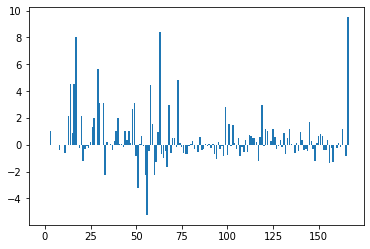

In [ ]:

# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
#model = LogisticRegression()
# fit the model
loaded_model.fit(Xt_train, Yt_train)

# get importance
importance = loaded_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,10)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 1.02506
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: -0.39167
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: -0.65075
Feature: 12, Score: 0.00000
Feature: 13, Score: 2.13561
Feature: 14, Score: 4.53544
Feature: 15, Score: 0.86119
Feature: 16, Score: 4.54757
Feature: 17, Score: 8.04774
Feature: 18, Score: 0.00413
Feature: 19, Score: -0.23921
Feature: 20, Score: 2.17184
Feature: 21, Score: -1.22083
Feature: 22, Score: -0.33653
Feature: 23, Score: -0.09507
Feature: 24, Score: -0.22959
Feature: 25, Score: 0.23853
Feature: 26, Score: 1.35158
Feature: 27, Score: 1.99716
Feature: 28, Score: -0.03017
Feature: 29, Score: 5.65572
Feature: 30, Score: 3.13416
Feature: 31, Score: 0.00016
Feature: 32, Score: 3.12831
Feature: 33, Score: -2.27043
Feature: 34, Score: 0.19661
Feature: 35, Score: 0

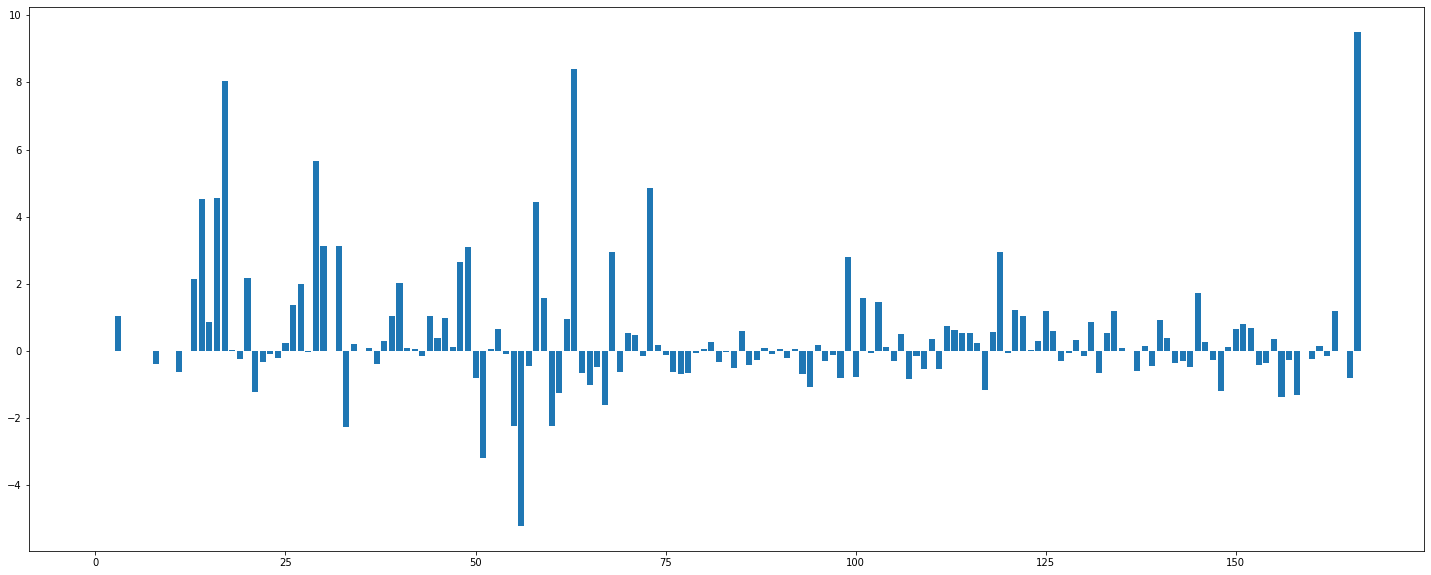

In [ ]:

# get importance
importance = loaded_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
imp = pd.DataFrame(importance)
imp2= imp.set_axis(['Score'], axis=1, inplace=False)
imp2

,Score
0,0.000000
1,0.000000
2,0.000000
3,1.025061
4,0.000000
...,...
162,-0.154709
163,1.172722
164,-0.010005
165,-0.830881


In [ ]:
imp2.nlargest(167, 'Score')

,Score
166,9.509456
63,8.394271
17,8.047738
29,5.655718
73,4.863268
...,...
60,-2.263455
55,-2.263455
33,-2.270427
51,-3.213045


In [ ]:
##
from google.colab import files
f_imp= imp2.nlargest(167, 'Score')
f_imp.to_csv('asxl_UnderMACCS_LR_HPT_FeatureImp.csv', encoding = 'utf-8-sig') 
files.download('asxl_UnderMACCS_LR_HPT_FeatureImp.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cp 'asxl_UnderMACCS_LR_HPT_FeatureImp.csv' /content/drive/MyDrive/PhD/LR_MACCS

cp: 'asxl_UnderMACCS_LR_HPT_FeatureImp.csv' and '/content/drive/MyDrive/PhD/LR_MACCS/asxl_UnderMACCS_LR_HPT_FeatureImp.csv' are the same file


In [ ]:
#Replace numbers with chemical info

In [ ]:
#Feature importance
feature_names = [f"feature {i}" for i in range(Xt_train.shape[1])]

In [ ]:
feature_names

['feature 0',
 'feature 1',
 'feature 2',
 'feature 3',
 'feature 4',
 'feature 5',
 'feature 6',
 'feature 7',
 'feature 8',
 'feature 9',
 'feature 10',
 'feature 11',
 'feature 12',
 'feature 13',
 'feature 14',
 'feature 15',
 'feature 16',
 'feature 17',
 'feature 18',
 'feature 19',
 'feature 20',
 'feature 21',
 'feature 22',
 'feature 23',
 'feature 24',
 'feature 25',
 'feature 26',
 'feature 27',
 'feature 28',
 'feature 29',
 'feature 30',
 'feature 31',
 'feature 32',
 'feature 33',
 'feature 34',
 'feature 35',
 'feature 36',
 'feature 37',
 'feature 38',
 'feature 39',
 'feature 40',
 'feature 41',
 'feature 42',
 'feature 43',
 'feature 44',
 'feature 45',
 'feature 46',
 'feature 47',
 'feature 48',
 'feature 49',
 'feature 50',
 'feature 51',
 'feature 52',
 'feature 53',
 'feature 54',
 'feature 55',
 'feature 56',
 'feature 57',
 'feature 58',
 'feature 59',
 'feature 60',
 'feature 61',
 'feature 62',
 'feature 63',
 'feature 64',
 'feature 65',
 'feature 66',
 'fea

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,10)

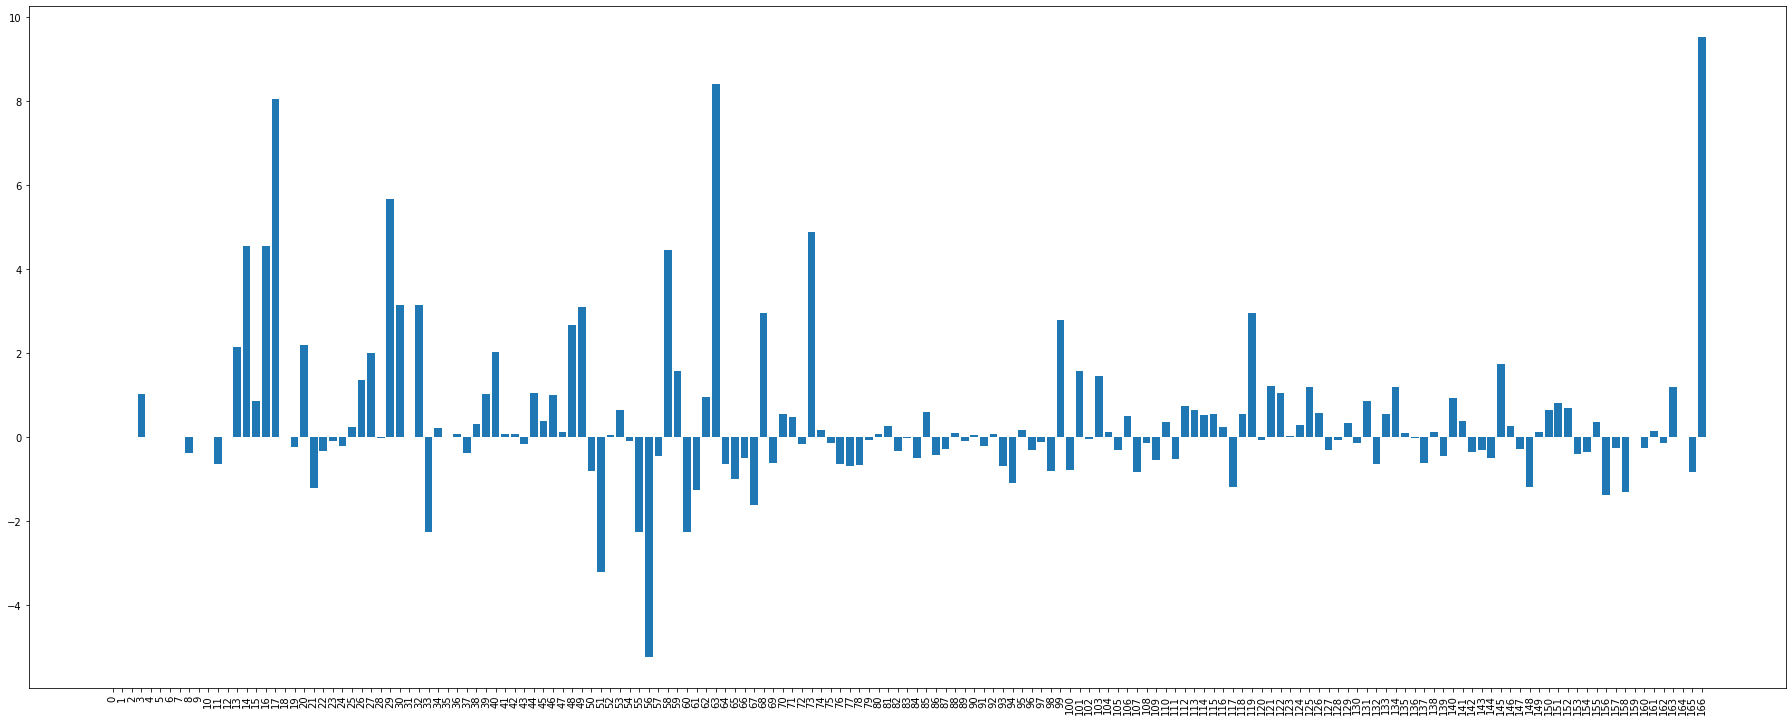

In [ ]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
plt.tight_layout()
plt.xticks([x for x in range(len(importance))], rotation=90)
pyplot.show()